In [5]:
import yfinance as yf
tickers = ['AAPL', 'FDP', 'JPM', 'NEE', 'LLY', 'WLDN', 'FSLR', 'KO']

df = yf.download(tickers, start="2022-01-01")['Close']
returns = df.pct_change()


/var/folders/qj/6bfpb5dj423_qz_zy21j4rkm0000gn/T/ipykernel_38733/1571655255.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2022-01-01")['Close']
[*********************100%***********************]  8 of 8 completed


<Axes: xlabel='Ticker'>

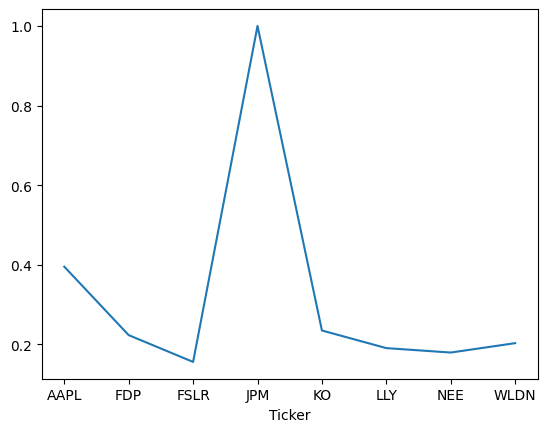

In [131]:
returns.corr()['JPM'].plot()

In [ ]:
import numpy as np
import pandas as pd
def calculate_return_stats(returns):
    mean = (returns.mean() * 252)
    volatility = (returns.std() * np.sqrt(252))
    sharpe_ratio = mean / volatility if volatility != 0 else 0
    return pd.Series({
        "mean": mean,
        "volatility": volatility,
        "sharpe_ratio": sharpe_ratio
    })



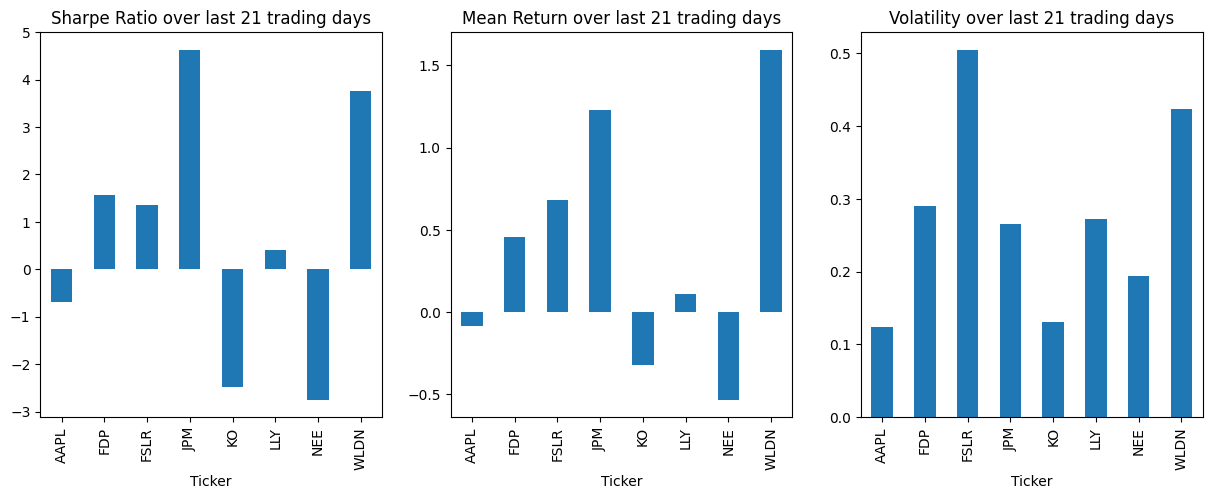

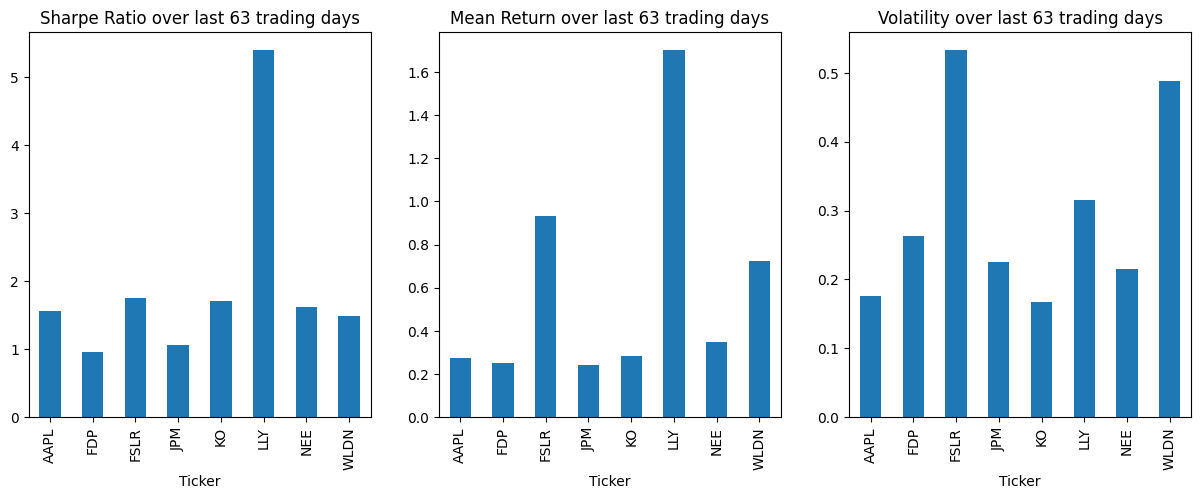

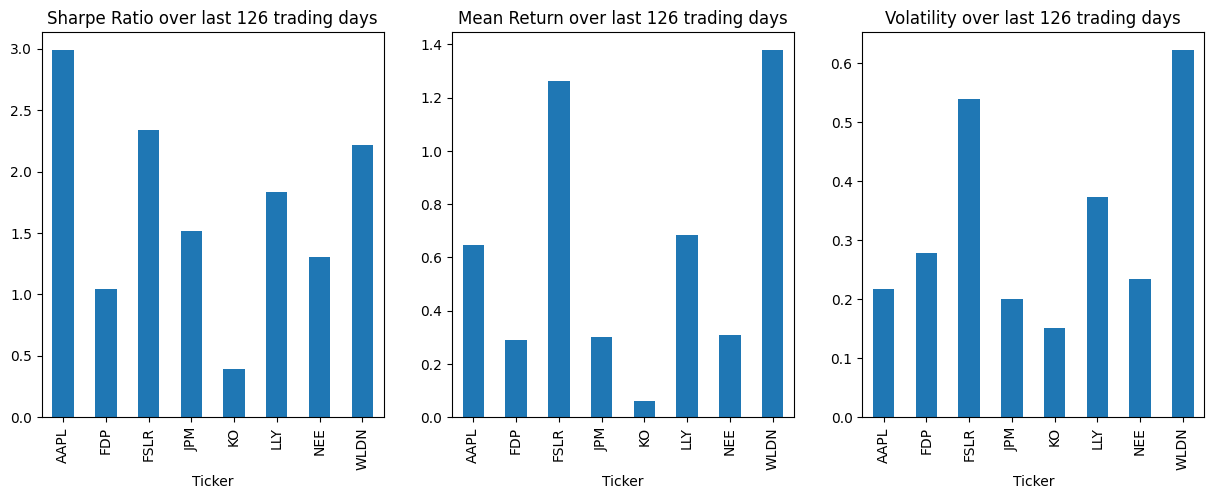

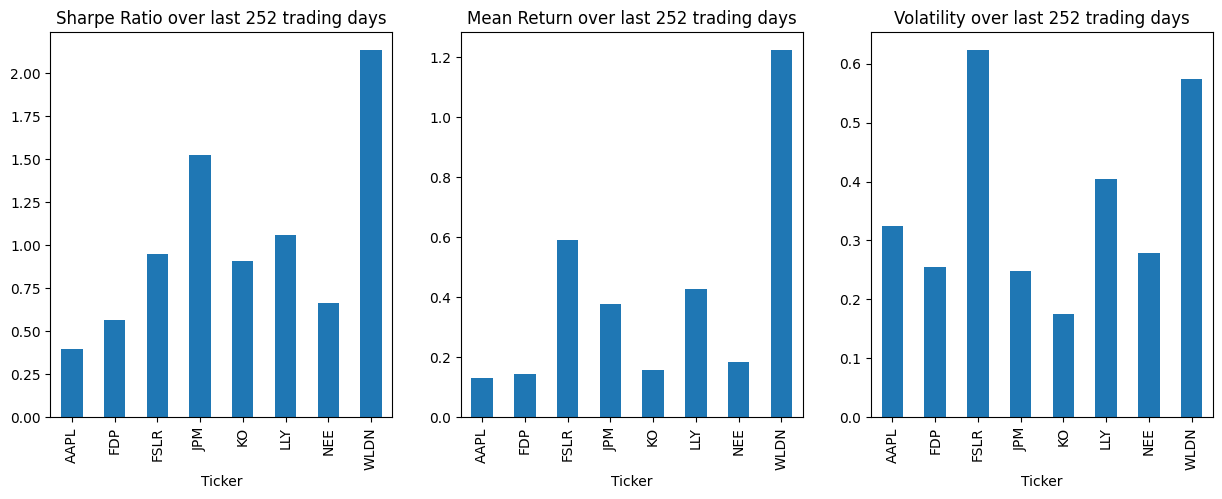

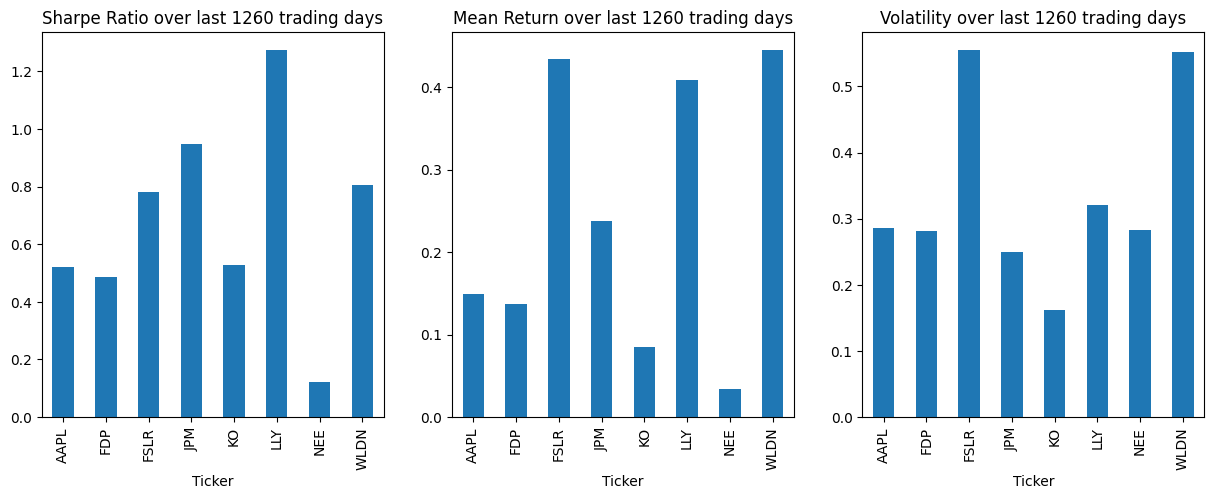

In [32]:
import matplotlib.pyplot as plt
for days in [21*1, 21*3, 21*6, 252, 252*5]:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    stats = returns.iloc[-days:].apply(calculate_return_stats)
    stats.loc['sharpe_ratio'].plot.bar(ax=axs[0], title=f'Sharpe Ratio over last {days} trading days')
    stats.loc['mean'].plot.bar(ax=axs[1], title=f'Mean Return over last {days} trading days')
    stats.loc['volatility'].plot.bar(ax=axs[2], title=f'Volatility over last {days} trading days')
    plt.show()



In [106]:
from scipy.optimize import minimize
def optimize_portfolio(max_weight, max_variance):


    cov = returns.cov()

    def objective(weights):
        # portfolio_volatility = np.sqrt(weights.T @ (cov * 252) @ weights)
        portfolio_return = weights.T @ returns.iloc[-126:].mean() * 252
        return - portfolio_return

    def constraint(weights):
        return np.sum(weights) - 1

    def variance_constraint(weights):
        portfolio_variance = weights.T @ (cov * 252) @ weights
        return max_variance - portfolio_variance

    def max_weight_constraint(weights):
        return max_weight - np.max(weights)

    bounds = tuple((0, 1) for _ in range(len(returns.columns)))
    initial_weights = [1 / len(returns.columns)] * len(returns.columns)
    constraints = [{'type': 'eq', 'fun': constraint}, {'type': 'ineq', 'fun': variance_constraint}, {'type': 'ineq', 'fun': max_weight_constraint}]

    result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints)
    optimal_weights = result.x
    print(result)

    return optimal_weights


In [116]:
def plot_optimized_portfolio(max_weight, max_variance):
    pd.Series(optimize_portfolio(max_weight, max_variance), index=returns.columns).sort_values(ascending=False).plot.bar(title=f'Optimized Portfolio (max_weight={max_weight}, max_variance={max_variance})')

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -1.3626873100280332
           x: [ 1.540e-16  7.467e-16  1.252e-01  1.343e-16  0.000e+00
                0.000e+00  0.000e+00  8.748e-01]
         nit: 7
         jac: [-6.463e-01 -2.901e-01 -1.261e+00 -3.013e-01 -5.897e-02
               -6.857e-01 -3.065e-01 -1.377e+00]
        nfev: 64
        njev: 7
 multipliers: [-1.209e+00  3.077e-01  0.000e+00]


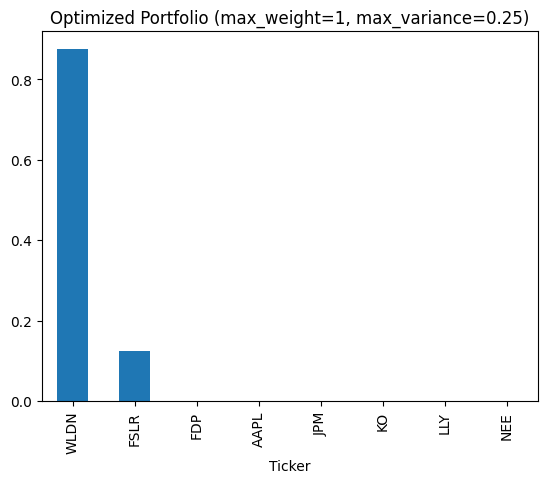

In [121]:
plot_optimized_portfolio(1, 0.25)

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -1.1301267137190845
           x: [ 2.588e-16  7.799e-16  3.031e-01  4.881e-16  1.352e-15
                3.063e-01  5.125e-16  3.906e-01]
         nit: 7
         jac: [-6.463e-01 -2.901e-01 -1.261e+00 -3.013e-01 -5.897e-02
               -6.857e-01 -3.065e-01 -1.377e+00]
        nfev: 63
        njev: 7
 multipliers: [-4.289e-01  3.506e+00  0.000e+00]


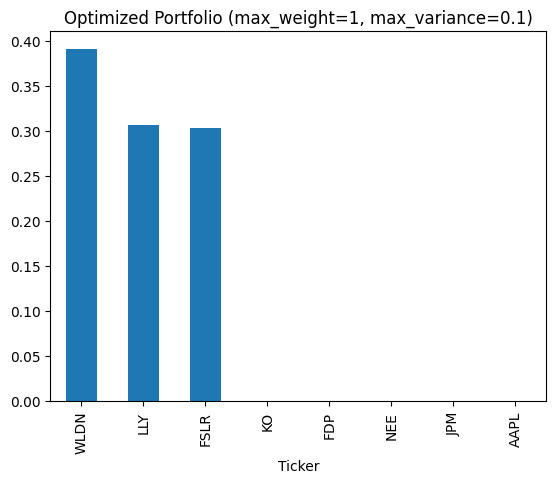

In [ ]:
plot_optimized_portfolio(1, 0.1)

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.8527043222877077
           x: [ 2.065e-01  1.175e-01  1.547e-01  0.000e+00  0.000e+00
                3.295e-01  4.906e-18  1.918e-01]
         nit: 8
         jac: [-6.463e-01 -2.901e-01 -1.261e+00 -3.013e-01 -5.897e-02
               -6.857e-01 -3.065e-01 -1.377e+00]
        nfev: 73
        njev: 8
 multipliers: [ 6.273e-02  9.154e+00  0.000e+00]


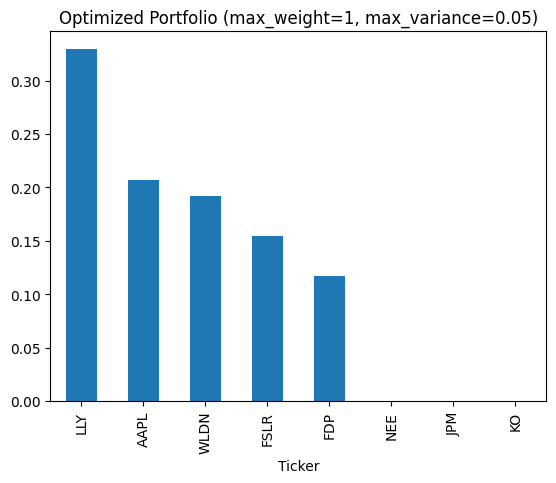

In [123]:
plot_optimized_portfolio(1, 0.05)